In [ ]:
pip install pycaret

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np

In [4]:
# reading the data
df=pd.read_csv('/content/gdrive/My Drive/FinalTable.csv')

In [5]:
df.head(5)

,_id,OCCUPANCY_DATE,Existing Shelters In Area,Max Temp (°C),Min Temp (°C),ORGANIZATION_NAME,SHELTER_NAME,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_PROVINCE,SHELTER_POSTAL_CODE,FACILITY_NAME,PROGRAM_NAME,SECTOR,OCCUPANCY,CAPACITY
0,30,2019-01-01T00:00:00,4,0.5,-3.0,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,32,40.0
1,134,2019-01-02T00:00:00,4,0.0,-11.0,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,37,40.0
2,238,2019-01-03T00:00:00,4,2.0,-4.5,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,34,40.0
3,342,2019-01-04T00:00:00,4,8.0,-0.5,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,33,40.0
4,446,2019-01-05T00:00:00,4,4.0,-3.0,City of Toronto,Streets To Homes,129 Peter St,Toronto,ON,M5V 1X1,129 Peter St,Streets to Homes Bedded Program,Co-ed,33,40.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38616 entries, 0 to 38615
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        38616 non-null  int64  
 1   OCCUPANCY_DATE             38616 non-null  object 
 2   Existing Shelters In Area  38616 non-null  int64  
 3   Max Temp (°C)              38616 non-null  float64
 4   Min Temp (°C)              38616 non-null  float64
 5   ORGANIZATION_NAME          38616 non-null  object 
 6   SHELTER_NAME               38616 non-null  object 
 7   SHELTER_ADDRESS            38616 non-null  object 
 8   SHELTER_CITY               38616 non-null  object 
 9   SHELTER_PROVINCE           38616 non-null  object 
 10  SHELTER_POSTAL_CODE        38616 non-null  object 
 11  FACILITY_NAME              38616 non-null  object 
 12  PROGRAM_NAME               38616 non-null  object 
 13  SECTOR                     38616 non-null  obj

# Convert date to YEAR,MONTH ,DAY

In [ ]:
new_df=df.copy()
new_df['OCCUPANCY_DATE']=pd.to_datetime(new_df['OCCUPANCY_DATE'])
new_df['OCCUPANCY_DATE_year']= new_df['OCCUPANCY_DATE'].map(lambda x: x.strftime('%Y'))
new_df['OCCUPANCY_DATE_Month']=new_df['OCCUPANCY_DATE'].map(lambda x:x.strftime('%B'))
new_df['OCCUPANCY_DATE_Day']=new_df['OCCUPANCY_DATE'].map(lambda x:x.strftime('%A'))

# DROP unnecessarly attributes

In [ ]:
new_df.drop(['_id','FACILITY_NAME','SHELTER_POSTAL_CODE','ORGANIZATION_NAME','SHELTER_ADDRESS','SHELTER_PROVINCE','SHELTER_NAME','OCCUPANCY_DATE','OCCUPANCY_DATE_year','PROGRAM_NAME','OCCUPANCY_DATE_Day','SHELTER_CITY'],axis=1,inplace=True)
# new_df['Vacancies']=new_df['CAPACITY']-new_df['OCCUPANCY']

In [ ]:
# new_df.drop(['OCCUPANCY'],axis=1,inplace=True)

In [ ]:
new_df

,Existing Shelters In Area,Max Temp (°C),Min Temp (°C),SECTOR,OCCUPANCY,CAPACITY,OCCUPANCY_DATE_Month
0,4,0.5,-3.0,Co-ed,32,40.0,January
1,4,0.0,-11.0,Co-ed,37,40.0,January
2,4,2.0,-4.5,Co-ed,34,40.0,January
3,4,8.0,-0.5,Co-ed,33,40.0,January
4,4,4.0,-3.0,Co-ed,33,40.0,January
...,...,...,...,...,...,...,...
38611,1,10.0,1.0,Youth,30,31.0,December
38612,1,5.0,1.0,Youth,31,31.0,December
38613,1,2.0,0.0,Youth,30,31.0,December
38614,1,9.5,0.5,Youth,31,31.0,December


In [11]:
df['SECTOR'].value_counts()

Men         11804
Women        8697
Co-ed        6278
Youth        6187
Families     5650
Name: SECTOR, dtype: int64

In [ ]:
# install flask

from flask import Flask

In [ ]:
# import resgression model from pycaret library
from pycaret.regression import *

In [ ]:
# setup the model
r = setup(new_df, target = 'OCCUPANCY', session_id=123,
          normalize = True, categorical_imputation = 'mode',
          trigonometry_features = True,
          )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(38616, 7)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Model training and Validation

In [ ]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.1145,6.5317,2.5557,0.9992,0.0943,0.0376
1,1.4491,21.4351,4.6298,0.9977,0.2565,0.0417
2,2.2948,176.9916,13.3038,0.9809,0.3224,0.0342
3,1.3684,12.1788,3.4898,0.9982,0.1404,0.0397
4,1.2363,10.8109,3.2880,0.9987,0.1554,0.0298
5,1.9365,52.8778,7.2717,0.9967,0.3041,0.0443
6,2.2843,373.5073,19.3263,0.9606,0.2221,0.0514
7,1.4301,16.8916,4.1099,0.9985,0.1949,0.0610
8,1.5307,40.4269,6.3582,0.9962,0.0891,0.0408
9,1.8603,39.9959,6.3242,0.9958,0.2087,0.0545


# Plot residuals of trained model

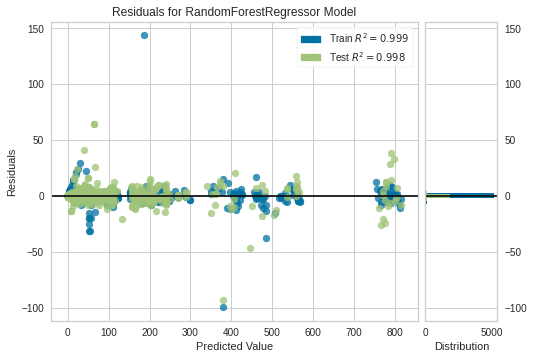

In [ ]:
plot_model(rf, plot='residuals')

## Save transformation pipeline and model

Transformation Pipeline and Model Succesfully Saved


In [ ]:
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.4218,18.2199,4.2685,0.9981,0.2046,0.0339


,Max Temp (°C),Min Temp (°C),CAPACITY,Existing Shelters In Area_1,Existing Shelters In Area_13,Existing Shelters In Area_2,Existing Shelters In Area_3,Existing Shelters In Area_4,Existing Shelters In Area_5,SECTOR_Co-ed,SECTOR_Families,SECTOR_Men,SECTOR_Women,SECTOR_Youth,OCCUPANCY_DATE_Month_April,OCCUPANCY_DATE_Month_August,OCCUPANCY_DATE_Month_December,OCCUPANCY_DATE_Month_February,OCCUPANCY_DATE_Month_January,OCCUPANCY_DATE_Month_July,OCCUPANCY_DATE_Month_June,OCCUPANCY_DATE_Month_March,OCCUPANCY_DATE_Month_May,OCCUPANCY_DATE_Month_November,OCCUPANCY_DATE_Month_October,OCCUPANCY_DATE_Month_September,OCCUPANCY,Label
0,0.666644,0.573337,-0.496547,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,12.02
1,-0.840890,-1.045925,1.803481,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270,270.00
2,-1.142396,-1.094994,-0.380654,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,22.93
3,1.355802,0.867748,0.234469,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,92,92.58
4,-0.625528,-0.898720,-0.184528,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47,46.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,-0.022514,-0.015486,-0.086465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,53,56.33
2313,1.312730,0.867748,-0.220187,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34,26.60
2314,-0.970107,-0.947788,-0.425228,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,19.89
2315,-0.970107,-0.947788,-0.353910,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,23.26


In [ ]:
finalized_model = finalize_model(rf)

In [ ]:
save_model (finalized_model, model_name= '/content/gdrive/My Drive/Machine Learning/Final project/With Pycaret/finalized_rf_model4')

Transformation Pipeline and Model Succesfully Saved


In [ ]:
import requests
url = 'https://smart-city-toronto.herokuapp.com/predict_api'
pred = requests.post(url,json={'Existing Shelters In Area':4, 'Max Temp (°C)':0, 'Min Temp (°C)':-3, 'SECTOR':'Men', 'CAPACITY':30, 'OCCUPANCY_DATE':'2019-01-01T00:00:00'})
print(pred.json())